<a href="https://colab.research.google.com/github/davidr1008/Day10/blob/main/Day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
y_pred = rfc.predict(x_test)

In [9]:
print(print(rfc.predict(sc.transform([[30,87000]]))))

[0]
None


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_pred, y_test)
print(cm)

accuracy_score(y_pred, y_test)

[[70  3]
 [ 0 27]]


0.97

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


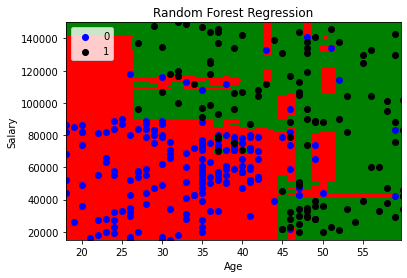

In [13]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min() - 0, stop = x_set[:,0].max()+0, step = 0.25), 
                    np.arange(start = x_set[:,1].min() - 0, stop = x_set[:,1].max()+1, step = 0.25))
plt.contourf(x1, x2, rfc.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape), cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, -1], c = ListedColormap(("blue","black"))(i), label = j)

plt.title("Random Forest Regression")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


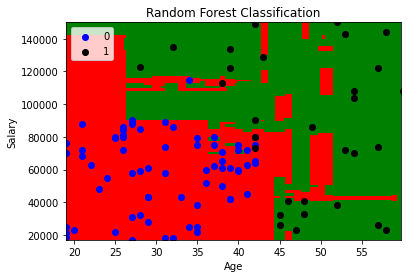

In [15]:
from matplotlib.colors import ListedColormap

x_set, y_set = sc.inverse_transform(x_test), y_test

x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 0, step = 0.25),
                    np.arange(start = x_set[:, 1].min() - 0, stop = x_set[:, 1].max() + 1, step = 0.25))

plt.contourf(x1, x2, rfc.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             cmap = ListedColormap(("red", "green")))

#To solve the outlier we need to mention the limitations

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(("blue", "black"))(i), label = j)

plt.title("Random Forest Classification")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()